<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-2-Linear-Models/blob/master/Jisha_Obukwelu_DSPT3_214_Regression_Classification_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment

- [x] Watch Aaron's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [x] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Begin with baselines for classification.
- [x] Use scikit-learn for logistic regression.
- [x] Get your validation accuracy score.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

---


## Stretch Goals

- [] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [x] Make exploratory visualizations.
- [x] Do one-hot encoding. For example, you could try `quantity`, `basin`, `extraction_type_class`, and more. (But remember it may not work with high cardinality categoricals.)
- [x] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [x] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

---

## Data Dictionary 

### Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

--- 

## Generate a submission

Your code to generate a submission file may look like this:

```python
# estimator is your model or pipeline, which you've fit on X_train

# X_test is your pandas dataframe or numpy array, 
# with the same number of rows, in the same order, as test_features.csv, 
# and the same number of columns, in the same order, as X_train

y_pred = estimator.predict(X_test)


# Makes a dataframe with two columns, id and status_group, 
# and writes to a csv file, without the index

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
```

If you're working locally, the csv file is saved in the same directory as your notebook.

If you're using Google Colab, you can use this code to download your submission csv file.

```python
from google.colab import files
files.download('your-submission-filename.csv')
```

---

####Imports 

In [0]:
#No category encoders
!pip install category_encoders

     |████████████████████████████████| 102kB 5.5MB/s 


In [0]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#####Importing the following to get my graphs to show

In [0]:
 %matplotlib inline

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read the Tanzania Waterpumps data
# train_features.csv : the training set features
# train_labels.csv : the training set labels
# test_features.csv : the test set features
# sample_submission.csv : a sample submission file in the correct format

train_features = pd.read_csv(DATA_PATH+'waterpumps/train_features.csv')
train_labels = pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv')
test_features = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
# sample_submission = pd.read_csv(DATA_PATH+'waterpumps/waterpumps/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
# assert sample_submission.shape == (14358, 2)

#####What is in my data?

In [0]:
print(train_features.shape)
train_features.head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [0]:
print(train_labels.shape)
train_labels.head()

(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


###1. Train/Val/Test Split

##### Merging before doing split/Also for data analysis

In [0]:
#Can merge on id
merge_df = pd.merge(train_features, train_labels)

In [0]:
print(merge_df.shape)
merge_df.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


#####Train/Val Split

In [0]:
train, val = train_test_split(merge_df, random_state = 42)
print(train.shape, val.shape)

(44550, 41) (14850, 41)


In [0]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2691
gps_height                   0
installer                 2700
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 282
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2525
recorded_by                  0
scheme_management         2922
scheme_name              21132
permit                    2285
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Fortunately, the null data does not to seem to be the ones that I need to make predictions, so I will ignore at present.

### 2. Begin with baselines for classification.

In [0]:
target = 'status_group'
y_train = train[target]
y_train.value_counts(normalize = True)

functional                 0.542334
non functional             0.384871
functional needs repair    0.072795
Name: status_group, dtype: float64

How does this compare to us guessing the majority?

In [0]:
majority = y_train.mode()[0]
y_pred = [majority]*len(y_train)
y_pred

['functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'functional',
 'function

In [0]:
accuracy_score(y_train, y_pred)

0.542334455667789

In [0]:
y_val = val[target]
y_pred = [majority]*len(y_val)
accuracy_score(y_val, y_pred)

0.5453198653198653

Better but not much :(

###3. Data Exploration

In [0]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44550.0,37087.547744,21436.367755,0.00000,18555.250000,36992.500000,55631.500000,7.424700e+04
amount_tsh,44550.0,326.361114,3291.640548,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,44550.0,668.105926,693.033591,-63.00000,0.000000,369.000000,1320.000000,2.770000e+03
longitude,44550.0,34.098625,6.530153,0.00000,33.087274,34.914362,37.181498,4.034519e+01
latitude,44550.0,-5.707581,2.941883,-11.64944,-8.529283,-5.022018,-3.327652,-2.000000e-08
num_private,44550.0,0.515376,13.633690,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,44550.0,15.366846,17.696176,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,44550.0,5.651291,9.690341,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,44550.0,178.793333,471.050949,0.00000,0.000000,25.000000,211.750000,3.050000e+04
construction_year,44550.0,1303.746083,950.647840,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


#####Heat map of correlation

#####Creating a functional category to have something to compare the other features to. 

In [0]:
train['functional'] = (train['status_group'] == 'functional').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
train.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,functional
id,1.000000,-0.006268,-0.006574,-0.002773,0.001188,-0.003426,0.002337,0.000665,-0.004197,-0.003763,-0.005291
amount_tsh,-0.006268,1.000000,0.071705,0.020448,-0.048519,0.003705,-0.025364,-0.022188,0.015413,0.063068,0.048601
gps_height,-0.006574,0.071705,1.000000,0.145863,-0.035940,0.007725,-0.184572,-0.172556,0.134991,0.655597,0.115510
longitude,-0.002773,0.020448,0.145863,1.000000,-0.425408,0.023121,0.037655,0.153283,0.086403,0.397087,0.030059
latitude,0.001188,-0.048519,-0.035940,-0.425408,1.000000,0.009563,-0.224758,-0.204002,-0.022094,-0.247484,0.002754
num_private,-0.003426,0.003705,0.007725,0.023121,0.009563,1.000000,-0.022961,-0.005821,0.004107,0.025855,0.007191
region_code,0.002337,-0.025364,-0.184572,0.037655,-0.224758,-0.022961,1.000000,0.679010,0.092005,0.034776,-0.102557
district_code,0.000665,-0.022188,-0.172556,0.153283,-0.204002,-0.005821,0.679010,1.000000,0.057128,0.051090,-0.054617
population,-0.004197,0.015413,0.134991,0.086403,-0.022094,0.004107,0.092005,0.057128,1.000000,0.258460,0.014925
construction_year,-0.003763,0.063068,0.655597,0.397087,-0.247484,0.025855,0.034776,0.051090,0.258460,1.000000,0.052543


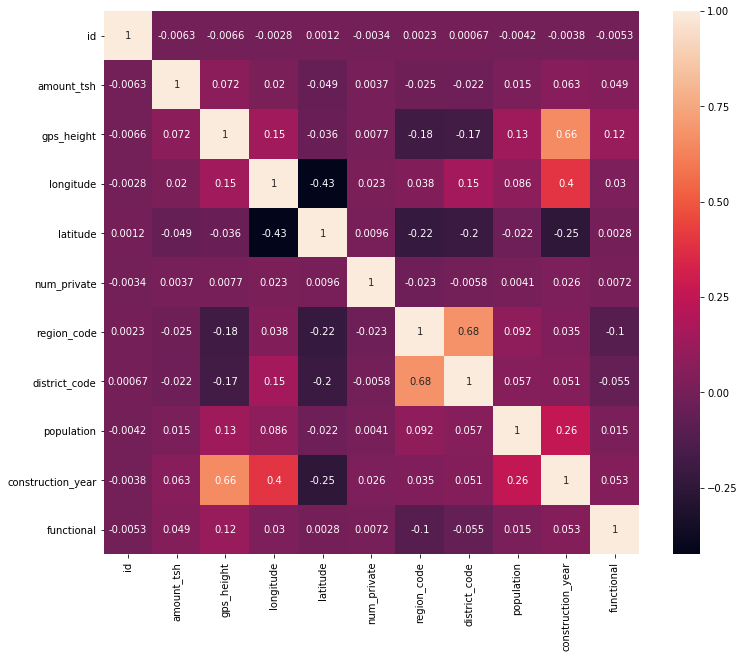

In [0]:
plt.figure(figsize=(12,10))
sns.heatmap(data = train.corr(), annot=True)

#https://github.com/mwaskom/seaborn/issues/1773
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();

#####Looking at categorical features to encode

In [0]:
#Can sort by number of unique values, this way it'll be easier to decide which features to onehotencode
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,44550,1,GeoData Consultants Ltd,44550
public_meeting,42025,2,True,38180
permit,42265,2,True,29078
status_group,44550,3,functional,24161
source_class,44550,3,groundwater,34358
quantity_group,44550,5,enough,24885
quantity,44550,5,enough,24885
management_group,44550,5,user-group,39392
quality_group,44550,6,good,38064
waterpoint_type_group,44550,6,communal standpipe,25884


#####* Will look at all without high cardinality <20
#####* What are the unique values in these categories?

######quantity

In [0]:
train['quantity'].value_counts()

enough          24885
insufficient    11334
dry              4726
seasonal         3014
unknown           591
Name: quantity, dtype: int64

######basin

In [0]:
train['basin'].value_counts()

Lake Victoria              7663
Pangani                    6692
Rufiji                     5974
Internal                   5847
Lake Tanganyika            4848
Wami / Ruvu                4518
Lake Nyasa                 3741
Ruvuma / Southern Coast    3400
Lake Rukwa                 1867
Name: basin, dtype: int64

######extraction_type_class

In [0]:
train['extraction_type_class'].value_counts()

gravity         19966
handpump        12412
other            4824
submersible      4672
motorpump        2243
rope pump         352
wind-powered       81
Name: extraction_type_class, dtype: int64

######source_class, source_type, source

In [0]:
train['source_class'].value_counts()

groundwater    34358
surface         9967
unknown          225
Name: source_class, dtype: int64

In [0]:
train['source_type'].value_counts()

spring                  12686
shallow well            12681
borehole                 8991
river/lake               7790
rainwater harvesting     1701
dam                       476
other                     225
Name: source_type, dtype: int64

######waterpoint_type_group

In [0]:
train['waterpoint_type'].value_counts()

communal standpipe             21353
hand pump                      13192
other                           4785
communal standpipe multiple     4531
improved spring                  598
cattle trough                     88
dam                                3
Name: waterpoint_type, dtype: int64

######management

In [0]:
train['management'].value_counts()

vwc                 30414
wug                  4888
water board          2176
wua                  1914
private operator     1479
parastatal           1312
water authority       674
other                 637
company               483
unknown               434
other - school         79
trust                  60
Name: management, dtype: int64

######water_quality

In [0]:
train['water_quality'].value_counts()

soft                  38064
salty                  3674
unknown                1398
milky                   620
coloured                373
salty abandoned         249
fluoride                159
fluoride abandoned       13
Name: water_quality, dtype: int64

######payment

In [0]:
train['payment'].value_counts()

never pay                19062
pay per bucket            6778
pay monthly               6144
unknown                   6108
pay when scheme fails     2960
pay annually              2710
other                      788
Name: payment, dtype: int64

#####How does this affect target?

quantity      status_group           
dry           non functional             0.968684
              functional                 0.025391
              functional needs repair    0.005925
enough        functional                 0.652602
              non functional             0.274623
              functional needs repair    0.072775
insufficient  functional                 0.524793
              non functional             0.380095
              functional needs repair    0.095112
seasonal      functional                 0.565030
              non functional             0.330126
              functional needs repair    0.104844
unknown       non functional             0.729272
              functional                 0.253807
              functional needs repair    0.016920
Name: status_group, dtype: float64 



(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

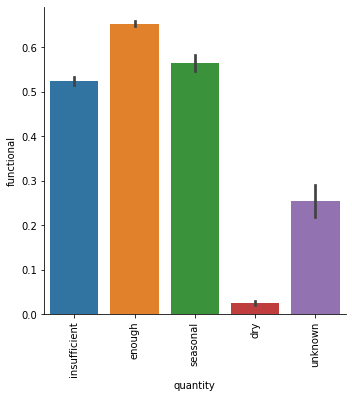



basin                    status_group           
Internal                 functional                 0.580640
                         non functional             0.347529
                         functional needs repair    0.071832
Lake Nyasa               functional                 0.648490
                         non functional             0.301524
                         functional needs repair    0.049987
Lake Rukwa               non functional             0.485806
                         functional                 0.402785
                         functional needs repair    0.111409
Lake Tanganyika          functional                 0.483086
                         non functional             0.400371
                         functional needs repair    0.116543
Lake Victoria            functional                 0.493410
                         non functional             0.406499
                         functional needs repair    0.100091
Pangani                  functiona

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

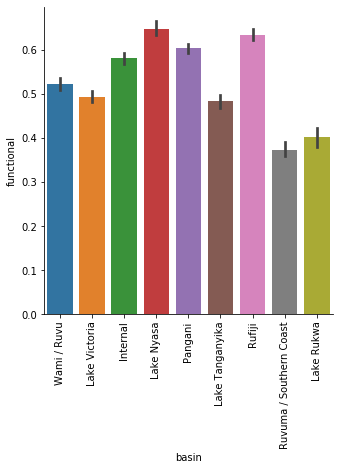



extraction_type            status_group           
afridev                    functional                 0.673929
                           non functional             0.302029
                           functional needs repair    0.024042
cemo                       functional                 0.552239
                           non functional             0.358209
                           functional needs repair    0.089552
climax                     non functional             0.730769
                           functional                 0.269231
gravity                    functional                 0.598217
                           non functional             0.301663
                           functional needs repair    0.100120
india mark ii              functional                 0.603096
                           non functional             0.363184
                           functional needs repair    0.033720
india mark iii             non functional             0.500000
  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

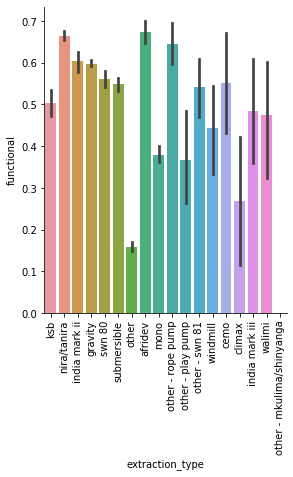



source                status_group           
dam                   non functional             0.586134
                      functional                 0.371849
                      functional needs repair    0.042017
hand dtw              functional                 0.560606
                      non functional             0.419697
                      functional needs repair    0.019697
lake                  non functional             0.776801
                      functional                 0.210896
                      functional needs repair    0.012302
machine dbh           functional                 0.493218
                      non functional             0.463210
                      functional needs repair    0.043572
other                 functional                 0.589595
                      non functional             0.404624
                      functional needs repair    0.005780
rainwater harvesting  functional                 0.598471
                      no

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

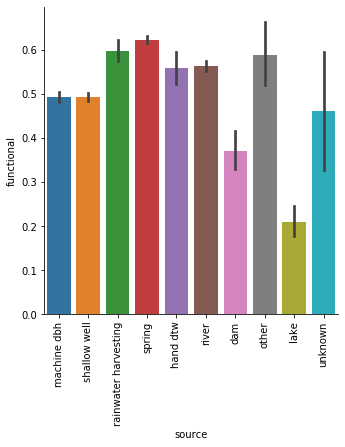



waterpoint_type_group  status_group           
cattle trough          functional                 0.750000
                       non functional             0.238636
                       functional needs repair    0.011364
communal standpipe     functional                 0.576727
                       non functional             0.340442
                       functional needs repair    0.082831
dam                    functional                 0.666667
                       non functional             0.333333
hand pump              functional                 0.615828
                       non functional             0.323378
                       functional needs repair    0.060794
improved spring        functional                 0.702341
                       non functional             0.178930
                       functional needs repair    0.118729
other                  non functional             0.823197
                       functional                 0.129781
       

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

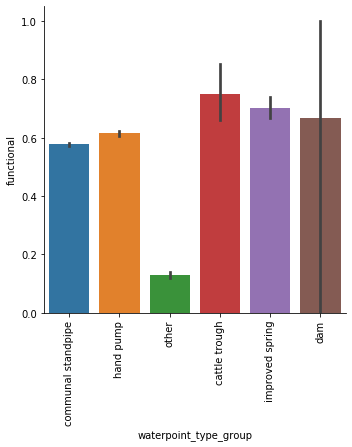



management        status_group           
company           non functional             0.575569
                  functional                 0.403727
                  functional needs repair    0.020704
other             functional                 0.607535
                  non functional             0.323391
                  functional needs repair    0.069074
other - school    non functional             0.746835
                  functional                 0.240506
                  functional needs repair    0.012658
parastatal        functional                 0.577744
                  non functional             0.300305
                  functional needs repair    0.121951
private operator  functional                 0.753212
                  non functional             0.222448
                  functional needs repair    0.024341
trust             functional                 0.550000
                  non functional             0.350000
                  functional needs rep

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

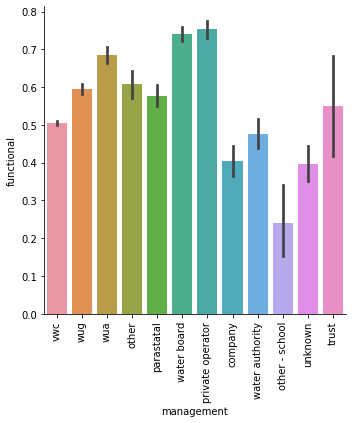



water_quality       status_group           
coloured            functional                 0.512064
                    non functional             0.391421
                    functional needs repair    0.096515
fluoride            functional                 0.773585
                    non functional             0.157233
                    functional needs repair    0.069182
fluoride abandoned  non functional             0.615385
                    functional                 0.384615
milky               functional                 0.543548
                    non functional             0.435484
                    functional needs repair    0.020968
salty               non functional             0.495645
                    functional                 0.456723
                    functional needs repair    0.047632
salty abandoned     functional                 0.506024
                    non functional             0.281124
                    functional needs repair    0.212851
so

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

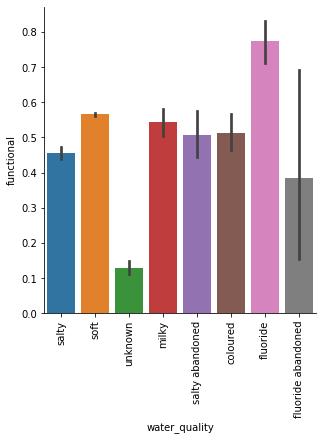



payment                status_group           
never pay              non functional             0.476917
                       functional                 0.447907
                       functional needs repair    0.075176
other                  functional                 0.583756
                       non functional             0.303299
                       functional needs repair    0.112944
pay annually           functional                 0.749446
                       non functional             0.181919
                       functional needs repair    0.068635
pay monthly            functional                 0.662109
                       non functional             0.226888
                       functional needs repair    0.111003
pay per bucket         functional                 0.677781
                       non functional             0.277515
                       functional needs repair    0.044703
pay when scheme fails  functional                 0.619595
       

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

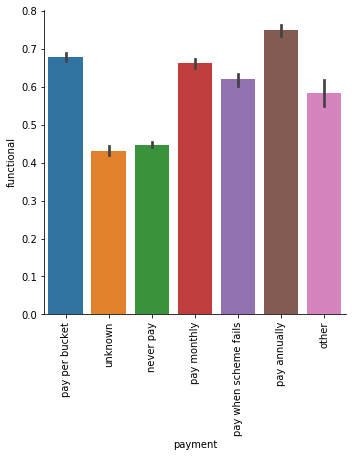

In [0]:
features = ['quantity', 'basin', 'extraction_type', 'source', 'waterpoint_type_group', 'management', 'water_quality', 'payment']

for feature in features:

  #Looking at categorical features against target
  compare = train.groupby(feature)['status_group'].value_counts(normalize =True)
  print(compare, '\n')

  #Creating graph to visualize how categorical data against functional target
  sns.catplot(x=feature, y= 'functional', kind = 'bar', data=train);
  plt.xticks(rotation=90);
  plt.show();

  print('\n')

Scatterplot was not as informative as I would like so, I need to encode status_group, at least functional into a number on it's own so that I could plot.

###4. . Use scikit-learn for logistic regression/ feature scaling

#####**Logistic Regression**

In [0]:
#not dropping id here because I need to drop it from both the train and validation sets
train = train.drop(['functional'], axis=1)

In [0]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
24947,33935,20.0,2011-03-08,Government Of Tanzania,330,Ce,38.123839,-6.087137e+00,Ccm,0,Wami / Ruvu,Kilangawageni,Pwani,6,1,Bagamoyo,Mbwewe,80,True,GeoData Consultants Ltd,VWC,Kwaruhombo wa,True,1972,ksb,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
22630,49654,0.0,2013-02-16,Dwsp,0,DWE,0.000000,-2.000000e-08,Mwamahonza,0,Lake Victoria,Mwamahala,Mwanza,17,1,Magu,Nkungulu,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
13789,39287,0.0,2011-08-13,Dasip,0,DASIP,33.312321,-2.814100e+00,Chanongu,0,Lake Victoria,Chanongu,Mwanza,19,4,Kwimba,Wala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
15697,60510,0.0,2013-01-20,Government Of Tanzania,1542,GOVERNMENT,34.783049,-4.842093e+00,Zahanati,0,Internal,Mungumaji,Singida,13,4,Singida Urban,Mungumaji,23,True,GeoData Consultants Ltd,WUA,NaN,True,2010,gravity,gravity,gravity,wua,user-group,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
22613,24259,0.0,2013-09-03,World Bank,523,Government,34.660944,-1.070733e+01,Kwa Mzee Charles,0,Lake Nyasa,Tumba,Ruvuma,10,3,Mbinga,Mbaha,1,NaN,GeoData Consultants Ltd,VWC,Government,True,2013,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


In [0]:
#LOGISTIC REGRESSIOn

#Select Feature and Target
target = 'status_group'
numeric_features = train.select_dtypes('number').columns.drop('id').tolist()
categorical_features = ['quantity', 'basin', 'extraction_type', 'source', 'waterpoint_type_group', 'management', 'water_quality', 'payment']
use_features = categorical_features + numeric_features

#Arrange x features matrices and y target vectors
# Training
X_train = train[use_features]
y_train = train[target]

#Validaion
X_val = val[use_features]
y_val = val[target]

#OneHotEncoder - encoding categorical data
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
# X_train_encoded.head()

#Imputing the model for any columns that have null values 
#I don't think I have any data to impute but it doesn't hurt 
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

#Scaling the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

#Logistic Regression
#Fit the model
model = LogisticRegression(solver='lbfgs', random_state=42)
model.fit(X_train_scaled, y_train)

#Accuracy
print('Validation Accuracy', model.score(X_val_scaled,y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Validation Accuracy 0.7276094276094276


My model is an improvement from the baseline of 0.542334 to 0.7276094276094276

### 5. Get and plot your coefficients.

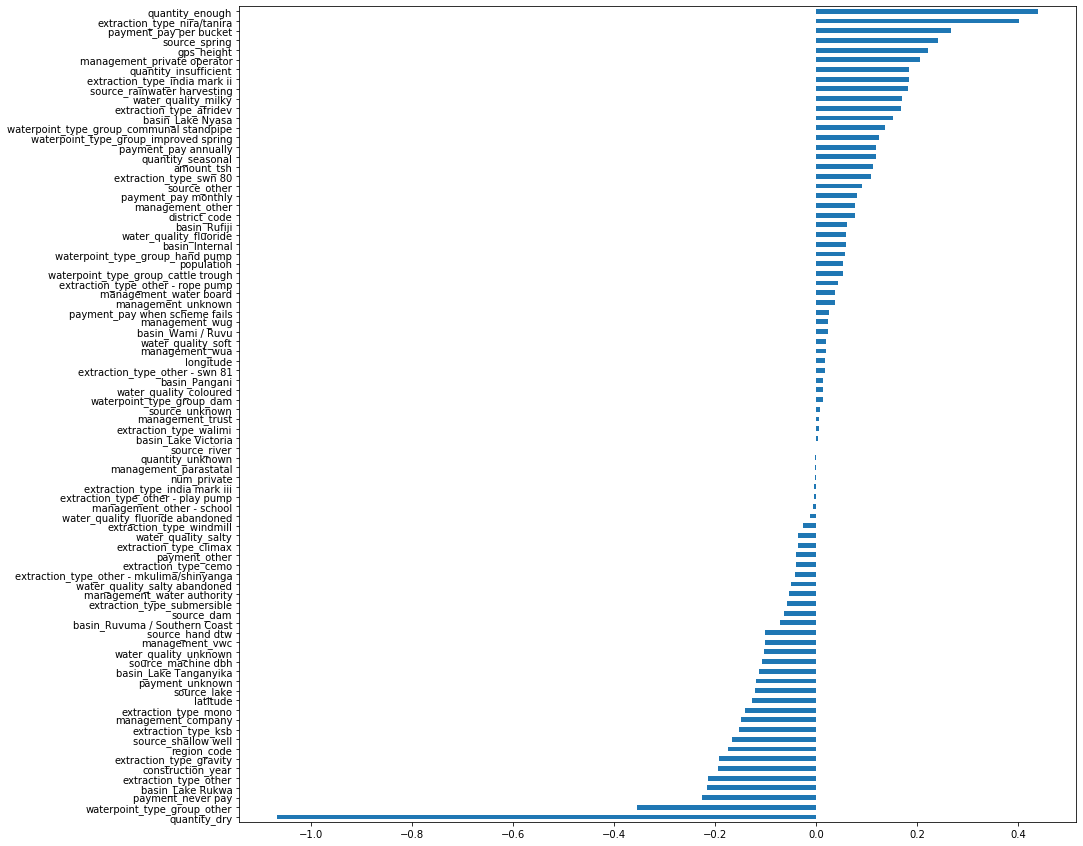

In [0]:
coefficients = pd.Series(
    model.coef_[0], 
    X_train_encoded.columns
    )

plt.figure(figsize = (15,15))
coefficients.sort_values().plot.barh();

### Just for fun
* because there are longitude and latitude plots



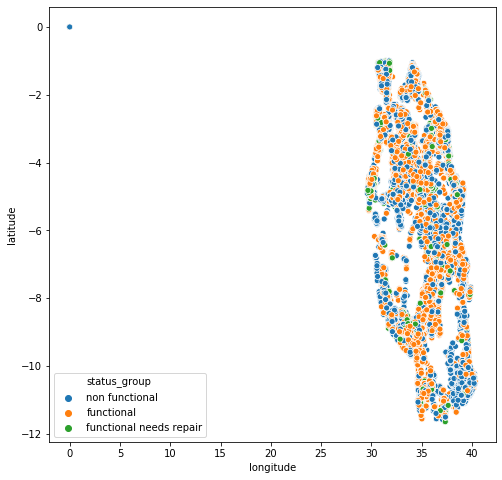

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='longitude',
                y= 'latitude',
                hue = 'status_group',
                data = train
                );

#####For further exploration - how does longitude and latitude correlate to the status_group. 
* Creating bins to see relations.

##### Using pd.cut

In [0]:
train['lat_bins'] = pd.cut(train['latitude'], bins=6, labels = [1,2,3,4,5,6])
train['long_bins'] = pd.cut(train['longitude'], bins=6, labels = [1,2,3,4,5,6])

In [0]:
train.groupby(['lat_bins','long_bins'])['status_group'].value_counts(normalize=True)

lat_bins  long_bins  status_group           
1         6          non functional             0.487723
                     functional                 0.454241
                     functional needs repair    0.058036
2         5          functional                 0.468400
                     non functional             0.436127
                     functional needs repair    0.095473
          6          functional                 0.641576
                     non functional             0.305645
                     functional needs repair    0.052779
3         5          non functional             0.501529
                     functional                 0.396024
                     functional needs repair    0.102446
          6          functional                 0.537808
                     non functional             0.417842
                     functional needs repair    0.044350
4         5          functional                 0.455403
                     non functional        

I am unsure what happened to long_bins 2-4

In [0]:
train.long_bins.value_counts()

6    30529
5    12682
1     1339
4        0
3        0
2        0
Name: long_bins, dtype: int64

In [0]:
train.lat_bins.value_counts()

5    11708
2     9033
4     8832
3     6539
1     4480
6     3958
Name: lat_bins, dtype: int64

Might try KClusters 